<a href="https://colab.research.google.com/github/yoshi2210/SoccerAnalytics/blob/main/MovieObjectTracking_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First of all

## Purpose
This code was intended to demo youtube 2 camera positional data by using YOLO to detect objects and Strong sort to track those. I have to note I skipped general process that I create YOLO learning model for a specific purpose with custimzed labels and use best.pt as weights data for Strong sort with LabelImg or anything to support you to annotate data.

# Git&pip necessary files and libraries
 YOLO Strong Sort

In [ ]:
! git clone --recurse-submodules https://github.com/mikel-brostrom/Yolov5_StrongSORT_OSNet.git

Cloning into 'Yolov5_StrongSORT_OSNet'...
remote: Enumerating objects: 1439, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 1439 (delta 33), reused 31 (delta 10), pack-reused 1372
Receiving objects: 100% (1439/1439), 36.00 MiB | 43.52 MiB/s, done.
Resolving deltas: 100% (711/711), done.
Submodule 'strong_sort/deep/reid' (https://github.com/KaiyangZhou/deep-person-reid) registered for path 'strong_sort/deep/reid'
Submodule 'yolov5' (https://github.com/ultralytics/yolov5.git) registered for path 'yolov5'
Cloning into '/content/Yolov5_StrongSORT_OSNet/Yolov5_StrongSORT_OSNet/strong_sort/deep/reid'...
remote: Enumerating objects: 9833, done.        
remote: Counting objects: 100% (10/10), done.        
remote: Compressing objects: 100% (10/10), done.        
remote: Total 9833 (delta 1), reused 4 (delta 0), pack-reused 9823        
Receiving objects: 100% (9833/9833), 9.57 MiB | 34.26 MiB/s, done.
Resolving deltas: 100% (7

In [ ]:
! git submodule update --init

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
cd /content/Yolov5_StrongSORT_OSNet


/content/Yolov5_StrongSORT_OSNet


In [ ]:
ls

LICENSE      README.md*         strong_sort/  yolov5/
MOT16_eval/  requirements.txt*  track.py


In [ ]:
! pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 5.3 MB/s 
     |████████████████████████████████| 5.8 MB 46.6 MB/s 
     |████████████████████████████████| 64 kB 2.5 MB/s 
     |████████████████████████████████| 190 kB 63.6 MB/s 
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 64 kB 3.3 MB/s 
     |████████████████████████████████| 73 kB 1.9 MB/s 
     |████████████████████████████████| 68 kB 8.2 MB/s 
     |████████████████████████████████| 41 kB 310 kB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Appply algorithm to an original movie.
You can check all argparse from below readme.md  
https://github.com/mikel-brostrom/Yolov5_StrongSORT_OSNet

## Note
If you want txt file to include which class labels are identified, you need to change track.py as follows.  
https://github.com/mikel-brostrom/Yolov5_StrongSORT_OSNet/issues/55

In my case, I changed track.py as below in order to make output txt file converted to dataframe later.

```
# draw boxes for visualization
                if len(outputs[i]) > 0:
                    for j, (output, conf) in enumerate(zip(outputs[i], confs)):
    
                        bboxes = output[0:4]
                        id = output[4]
                        cls = output[5]

                        # Here
                        c=int(cls)
                        c_name_to_note = names[c].replace(' ', '')
                        label=f'{id:0.0f}_{c_name_to_note}'
                        conf_val=f'conf:.2f'


                        if save_txt:
                            # to MOT format
                            bbox_left = output[0]
                            bbox_top = output[1]
                            bbox_w = output[2] - output[0]
                            bbox_h = output[3] - output[1]
                            # Write MOT compliant results to file
                            with open(txt_path + '.txt', 'a') as f:
                                f.write((str(path)+' '+'%g ' * 10 +' ' +label+' ' +conf_val +  '\n') % (frame_idx + 1, id, bbox_left,  # MOT format
                                                               bbox_top, bbox_w, bbox_h, -1, -1, -1, i))

```

In [ ]:
# ! python track.py --source /content/goal2.mp4 --yolo-weights yolov5l6.pt --strong-sort-weights osnet_x0_25_market1501.pt --save-vid  --save-txt

! python track.py --source 'https://www.youtube.com/watch?v=44qkG5-RcSk' --yolo-weights yolov5l6.pt --strong-sort-weights osnet_x0_25_market1501.pt --save-vid  --save-txt

ストリーミング出力は最後の 5000 行に切り捨てられました。
0: 384x640 3 persons, Done. YOLO:(0.030s), StrongSORT:(0.051s)
0: 384x640 3 persons, Done. YOLO:(0.031s), StrongSORT:(0.047s)
0: 384x640 3 persons, Done. YOLO:(0.030s), StrongSORT:(0.047s)
0: 384x640 3 persons, Done. YOLO:(0.029s), StrongSORT:(0.046s)
0: 384x640 3 persons, Done. YOLO:(0.029s), StrongSORT:(0.048s)
0: 384x640 3 persons, Done. YOLO:(0.029s), StrongSORT:(0.049s)
0: 384x640 3 persons, Done. YOLO:(0.029s), StrongSORT:(0.048s)
0: 384x640 3 persons, Done. YOLO:(0.029s), StrongSORT:(0.048s)
0: 384x640 3 persons, Done. YOLO:(0.029s), StrongSORT:(0.047s)
0: 384x640 3 persons, Done. YOLO:(0.029s), StrongSORT:(0.048s)
0: 384x640 3 persons, Done. YOLO:(0.029s), StrongSORT:(0.044s)
0: 384x640 3 persons, Done. YOLO:(0.029s), StrongSORT:(0.047s)
0: 384x640 3 persons, Done. YOLO:(0.029s), StrongSORT:(0.050s)
0: 384x640 1 person, Done. YOLO:(0.029s), StrongSORT:(0.029s)
0: 384x640 1 person, Done. YOLO:(0.029s), StrongSORT:(0.030s)
0: 384x640 1 person, Done

## txt2df

In [ ]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#df = pd.read_csv('/content/Yolov5_StrongSORT_OSNet/runs/track/exp2/tracks/goal2.txt',header=None,sep=" ") 
df = pd.read_csv('/content/Yolov5_StrongSORT_OSNet/runs/track/exp4/tracks/watch_v_44qkG5-RcSk.txt',header=None,sep=" ") 
cols = ['source_path','frame_idx+1','ID','bbox_left','bbox_top','bbox_w','bbox_h','nomean1','nomean2','nomean3','nomean4','nomean5','ReID','conf_val']
df.columns=cols
df.head(2)

,source_path,frame_idx+1,ID,bbox_left,bbox_top,bbox_w,bbox_h,nomean1,nomean2,nomean3,nomean4,nomean5,ReID,conf_val
0,['https_//www.youtube.com/watch_v_44qkG5-RcSk'],3,3,244,196,184,523,-1,-1,-1,0,NaN,3_person,conf:.2f
1,['https_//www.youtube.com/watch_v_44qkG5-RcSk'],3,6,29,287,65,214,-1,-1,-1,0,NaN,6_person,conf:.2f


In [ ]:
df.ReID.unique()

array(['3_person', '6_person', '7_person', '8_person', '11_person',
       '12_person', '13_person', '15_person', '16_person', '17_person',
       '18_person', '20_person', '26_trafficlight', '27_person',
       '28_person', '29_person', '32_person', '34_sportsball',
       '35_suitcase', '36_person', '38_person', '39_person', '40_person',
       '41_person', '42_person', '44_person', '45_person', '46_person',
       '47_person', '48_person', '49_person', '50_person', '51_person',
       '53_person', '55_person', '56_person', '58_person', '59_person',
       '73_person', '76_person', '81_sportsball', '82_person',
       '83_person', '85_person', '87_person', '88_person', '89_person',
       '90_person', '91_person', '92_person', '93_person',
       '94_sportsball', '95_person', '96_person', '98_person',
       '101_person', '104_person', '105_person', '106_person',
       '109_person', '110_person', '111_person', '113_person',
       '115_person', '117_person', '118_person', '119_perso

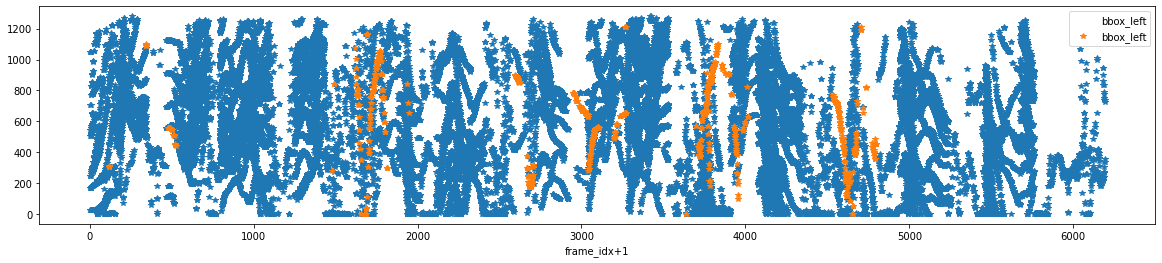

In [ ]:
df['sports_ball_flag'] = np.where(df.ReID.str.contains('ball'),'detected','none')
df['person_flag'] = np.where(df.ReID.str.contains('person'),'detected','none')

fig,ax = plt.subplots(figsize=(20,4))
df[df.person_flag =='detected'].plot(x='frame_idx+1',y='bbox_left',ax=ax,style='*')
df[df.sports_ball_flag =='detected'].plot(x='frame_idx+1',y='bbox_left',ax=ax,style='*')

Scenes that tracked sports ball were zoom-up movies...
image.png



# Another dataset for soccerball

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! kaggle kernels output kerneler/starter-detection-footballvscricketbal-f5a5e3b2-0 -p /path/to/dest

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

In [ ]:
! git clone https://github.com/douglasrizzo/JINT2020-ball-detection.git

Cloning into 'JINT2020-ball-detection'...
remote: Enumerating objects: 8647, done.
remote: Counting objects: 100% (8647/8647), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 8647 (delta 4181), reused 8642 (delta 4179), pack-reused 0
Receiving objects: 100% (8647/8647), 2.45 MiB | 25.10 MiB/s, done.
Resolving deltas: 100% (4181/4181), done.


In [ ]:
from IPython.display import Image
Image("/content/JINT2020-ball-detection/data/yolo/train/Robot-05-08-2019 20_07_24.19.jpg")

In [ ]:
! python track.py --source 'https://www.youtube.com/watch?v=44qkG5-RcSk' --yolo-weights '/content/JINT2020-ball-detection/networks/mobilenets/v3-large_224_1.0_float/saved_model/saved_model.pb' --strong-sort-weights osnet_x0_25_market1501.pt --save-vid  --save-txt

strong_sort/deep/reid/torchreid/metrics/rank.py:12: UserWarning: Cython evaluation (very fast so highly recommended) is unavailable, now use python evaluation.
  'Cython evaluation (very fast so highly recommended) is '
track: yolo_weights=['/content/JINT2020-ball-detection/networks/mobilenets/v3-large_224_1.0_float/saved_model/saved_model.pb'], strong_sort_weights=osnet_x0_25_market1501.pt, config_strongsort=strong_sort/configs/strong_sort.yaml, source=https://www.youtube.com/watch?v=44qkG5-RcSk, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.5, max_det=1000, device=, show_vid=False, save_txt=True, save_conf=False, save_crop=False, save_vid=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/track, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, hide_class=False, half=False, dnn=False
YOLOv5 🚀 2022-6-16 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Loading /content/JINT2020-ball

In [ ]:
! git clone https://github.com/deep-diver/Soccer-Ball-Detection-YOLOv2.git

Cloning into 'Soccer-Ball-Detection-YOLOv2'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 62 (delta 0), reused 3 (delta 0), pack-reused 57
Unpacking objects: 100% (62/62), done.


LICENSE                    README.md*         strong_sort/  yolov5l6.pt
MOT16_eval/                requirements.txt*  track.py      yolov5x.pt
osnet_x0_25_market1501.pt  runs/              yolov5/


In [ ]:
mkdir /content/Custom_input_folder

In [ ]:
os.makedirs("/content/Custom_input_folder/images")
os.makedirs("/content/Custom_input_folder/labels")
os.makedirs("/content/Custom_input_folder/train_valid")

In [ ]:
!rm -rf "/content/Custom_input_folder/labels" 

In [ ]:
# Annotationed txt files are to be uploaded as labels data

import shutil
shutil.copytree("/content/JINT2020-ball-detection/data/yolo/train","/content/Custom_input_folder/labels")

Error: ignored